## TomTom Live Traffic Index Scrape

This code retrieves the live traffic json from TomTom, and cleans this data to replicate the live chart shown on the webpage.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import json
import requests

# retrieve json file
url = "https://api.midway.tomtom.com/ranking/live/ITA_milan"
milan_req = requests.get(url)
miln_json = milan_req.json()

pd.set_option("display.max_rows", False)


In [19]:
# create empty lists of append data
live_traffic = []
time = []

count = len(italy_json["data"])-1

# append each item in the json file to the empty lists
i=0
while i<=count:
    live_traffic.append(milan_json["data"][i]["TrafficIndexLive"])
    time.append(milan_json["data"][i]["UpdateTime"])
    i+=1
    
# create dataframe with the traffic data 
df = pd.DataFrame({"Live Traffic":live_traffic}, index=time)
df.index = pd.to_datetime(df.index, unit="ms")
df.index.name = "Time"
df.head()

Live Traffic
Time                             
2020-04-11 11:01:30             8
2020-04-11 11:16:30             7
2020-04-11 11:31:30             7
2020-04-11 11:46:30             7
2020-04-11 12:01:30             7

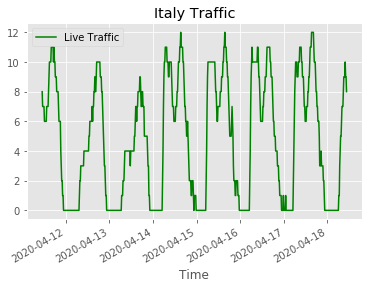

In [20]:
plt.style.use("ggplot")
ax = df.plot(color="Green")
plt.title("Milan Traffic")
plt.legend(loc=2)
#plt.box(False)